In [2]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
import os 
import pandas as pd
from   collections import Counter
import pickle
import seaborn as sns

In [83]:
read    = lambda f      : cv2.imread(f, cv2.IMREAD_GRAYSCALE)
norm    = lambda I      : cv2.normalize(I, None, 0, 1, cv2.NORM_MINMAX, cv2.CV_32F)
dct     = lambda I      : cv2.dct(I.astype(np.float32))
idct    = lambda I      : cv2.idct(I.astype(np.float32))
first   = lambda x      : int(str("{:.2e}".format(x))[0]) if x > 0 else 0
firsts  = lambda A      : [first(a) for a in A]
hist    = lambda I      : np.histogram(firsts(I.ravel()), bins=range(11))[0][1:]
pdf     = lambda h      : h/np.sum(h) if np.sum(h) > 0 else h
ben     = lambda        : np.log10(1 + 1/np.arange(1, 10))
diffs   = lambda P      : [x-y for x, y in zip(P, ben())]
sigma   = lambda P      : np.sqrt(np.sum([d**2 for d in diffs(P)]))
cod     = lambda P      : sigma(P)/np.mean(P)
mean    = lambda I      : np.mean(I.ravel())
median  = lambda I      : np.median(I.ravel())
diffs2  = lambda P      : [pow(x-y,2) for x, y in zip(P, ben())]
bscore  = lambda I      : 1/(1 + np.sum(diffs2(pdf(hist(dct(I))))))
xspace  = lambda x,y,r  : np.logspace(x,y,num=r, base=2, dtype=np.int32)

In [79]:
I = read('data/IMG_0026.jpeg')
c = cod(pdf(hist(dct(I))))
c

0.24974882937610896

In [124]:
def stats(images):
    data = []
    for im, I in enumerate(images):
        for i in xspace(3, 12, 10):
            scale = i/I.shape[1]
            h,w   = int(I.shape[0] * scale), int(I.shape[1] * scale)

            if h%2==1: h+=1
            if w%2==1: w+=1

            I2 = cv2.resize(I, (w,h), interpolation=cv2.INTER_AREA)
            m  = median(I2)
            c  = cod(pdf(hist(dct(I2))))
            data.append(
                {'image': im, 'scale': i, 'coeff': c, 'median': m}
            )
    return pd.DataFrame(data)

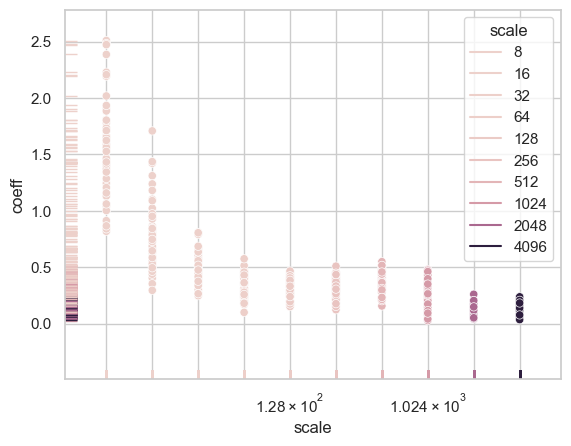

In [211]:
sns.set(style="whitegrid")
ax = sns.scatterplot(x="scale", y="coeff", hue="scale", data=df)
ax = sns.rugplot(x="scale", y="coeff", hue="scale", data=df)

# Set x scale to log
ax.set_xscale('log')

# Set x ticks
ax.set_xticks(list(xspace(3, 12, 10))

plt.show()